In [34]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,os

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,LSTM

In [2]:
data = pd.read_csv('SloanData.csv')

In [25]:
classdict = list(data['class'].astype('category').cat.categories)

In [26]:
data['class'] = data['class'].astype('category').cat.codes

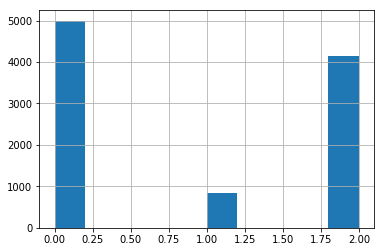

In [30]:
data['class'].hist()

In [39]:
classdict

['GALAXY', 'QSO', 'STAR']

In [38]:
data = data.sort_values(by=['class'])
data.reset_index(drop=True)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,0,0.118417,447,51877,233
1,1.237650e+18,246.096303,0.791414,19.13946,17.60407,16.78533,16.33308,16.03743,745,301,5,583,4.099380e+17,0,0.058033,364,52000,402
2,1.237650e+18,246.095644,0.822250,18.46074,16.66113,15.76071,15.28354,14.91325,745,301,5,583,4.099410e+17,0,0.060001,364,52000,411
3,1.237650e+18,246.004069,0.790919,17.58181,15.61991,14.68611,14.25259,13.94145,745,301,5,583,4.099400e+17,0,0.057432,364,52000,409
4,1.237650e+18,160.540555,0.793530,19.05568,17.38961,16.50775,16.08875,15.75363,756,301,5,299,3.086360e+17,0,0.099712,274,51913,507
5,1.237650e+18,160.718320,0.825910,19.00067,17.89044,17.16147,16.77460,16.51403,756,301,5,300,3.086460e+17,0,0.164261,274,51913,545
6,1.237650e+18,245.862898,0.826487,19.13682,17.68731,16.95025,16.58156,16.33688,745,301,5,582,4.099280e+17,0,0.056300,364,52000,364
7,1.237650e+18,160.804466,0.656633,19.42350,18.32027,17.52735,17.07713,16.82989,756,301,5,300,3.097270e+17,0,0.125153,275,51910,381
8,1.237650e+18,246.168419,0.815667,17.70825,15.98851,15.15354,14.72000,14.43140,745,301,5,584,4.099420e+17,0,0.057138,364,52000,418
9,1.237650e+18,245.577559,0.765601,18.84787,17.41474,16.51413,16.05776,15.70811,745,301,5,580,3.897320e+17,0,0.142005,346,51693,622


In [40]:
rs = data[['class','redshift']]

In [41]:
rs

,class,redshift
9999,0,0.118417
3544,0,0.058033
3543,0,0.060001
3542,0,0.057432
6865,0,0.099712
6869,0,0.164261
3539,0,0.056300
6870,0,0.125153
3546,0,0.057138
3537,0,0.142005
